# **Project 3**, APS1070 Fall 2021
#### **PCA**
Liyan Liu

In this project we work on a Covid-19 dataset that reports the number  cases for different countries at the end of each day.

# Part 1: Getting started [1 Marks]

In [ ]:
import pandas as pd
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/confirmed-june21.csv',
    index_col=0,
    thousands=','
)

In [ ]:
cases_raw

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2021-05-07,2021-05-08,2021-05-09,2021-05-10,2021-05-11,2021-05-12,2021-05-13,2021-05-14,2021-05-15,2021-05-16,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29,2021-05-30,2021-05-31,2021-06-01,2021-06-02,2021-06-03,2021-06-04,2021-06-05,2021-06-06,2021-06-07,2021-06-08,2021-06-09,2021-06-10,2021-06-11,2021-06-12,2021-06-13,2021-06-14,2021-06-15
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,61455,61755,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111,70761,71838,72977,74026,75119,76628,77963,79224,80841,82326,84050,85892,87716,88740,89861,91458,93272
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,131577,131666,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297,132309,132315,132337,132351,132360,132372,132374,132379,132384,132397,132415,132426,132437,132449,132459,132461,132469
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,123692,123900,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456,128725,128913,129218,129640,129976,130361,130681,130958,131283,131647,132034,132355,132727,133070,133388,133742,134115
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13390,13406,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693,13693,13727,13729,13744,13752,13758,13758,13758,13777,13781,13791,13805,13813,13813,13813,13826,13828
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,28201,28477,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180,34366,34551,34752,34960,35140,35307,35594,35772,35854,36004,36115,36325,36455,36600,36705,36790,36921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,3137,3245,3412,3489,3571,3658,3740,3816,4112,4212,4359,4512,4720,4809,4941,5119,5275,5404,5931,6086,6356,6396,6908,7107,7432,7625,7870,8063,8364,8580,8791,9027,9222,9635,9835,10048,10337,10630,10881,11304
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,300946,301437,301751,302249,302777,303270,303270,303270,303658,303827,304074,304074,304532,304532,304968,305201,305201,305777,306334,306795,306795,307569,307838,308048,308350,308732,309036,309333,309644,309853,310026,310026,310544,310544,311018,311018,311018,311534,311690,311948
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6446,6462,6482,6485,6492,6498,6507,6523,6538,6543,6568,6586,6593,6613,6632,6649,6658,6662,6670,6688,6696,6723,6731,6737,6742,6751,6759,6767,6773,6780,6787,6812,

1. Write a function to do the following: **[0.25]**
    * Takes the dataframe, and your country list as inputs (US, China, Canada, ...)
    * Plots time-series for the input list (it is best to plot each country in a separate graph (subplot), so you can easily compare them.)
    
2. Apply `StandardScalar` to the data. Each day should have a `mean` of zero and a `StD` of 1. **[0.25]**
3. Run the function in `step 1` on the standardized dataset for the `US`, `China`, and `Canada`.   **[0.25]**
4. Discuss the trends in the standardized time-series for the `US`, `Canada`, and `China`. What does it mean if the curve goes up or down (are the number of covid cases negative?) What does the sign of values indicate? **[0.25]**

In [ ]:
#create a country list for visualizing the coutries
country_list=cases_raw.index.to_list()
country_list

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
def PlotCovid(df,country):
  COUNT = len(country)
  ROWS = math.ceil(COUNT/2)
  fig = plt.figure(figsize=(15, ROWS * 6))
  date=pd.to_datetime(df.columns)
  for i in range(0, COUNT):
    plt.subplot(ROWS, 2, i+1)
    sns.lineplot(x=date,y=df.loc[country[i]])
    plt.ylabel("Case")
    plt.title(country[i])
    plt.xticks(rotation=45)
   

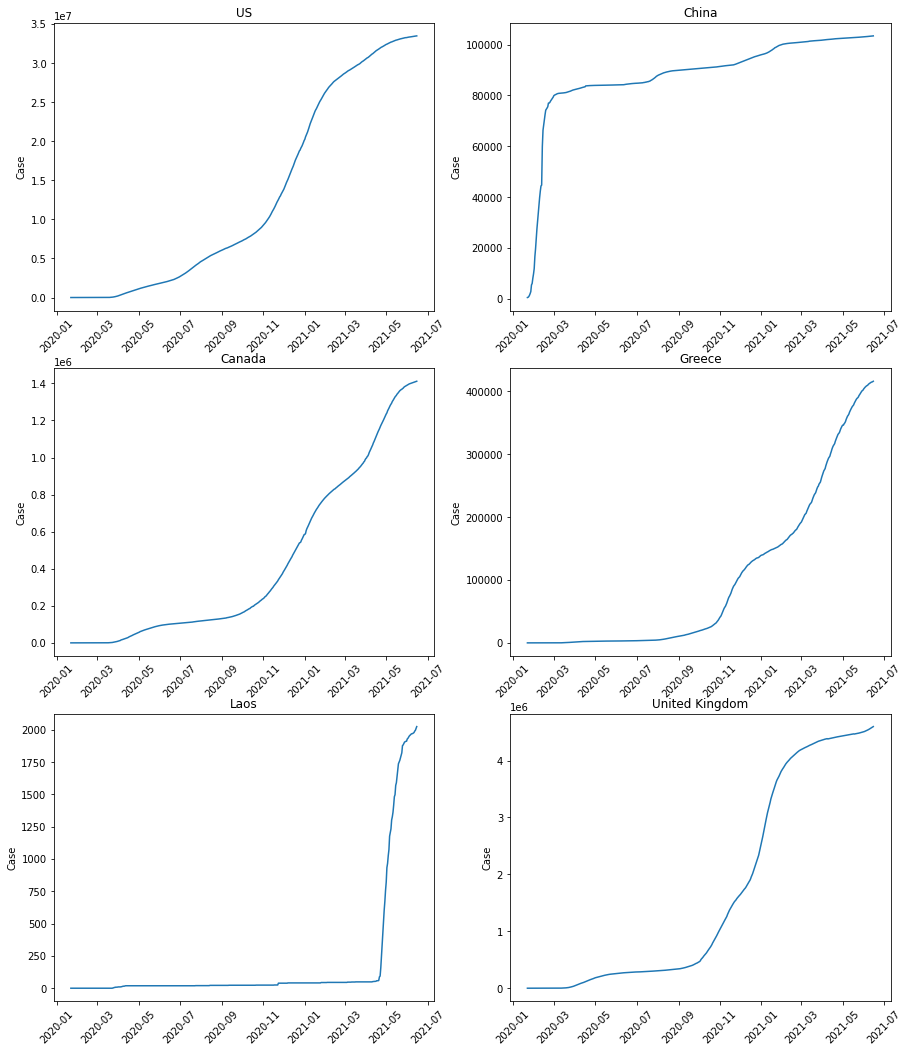

In [ ]:
#testing the function PlotCovid by randomly creating a list of countries
PlotCovid(cases_raw,["US","China","Canada","Greece","Laos","United Kingdom"])

In [ ]:
#Question 2: Apply StandardScalar to the data. Each day should have a mean=0, sd=1.
import numpy as np
from sklearn.preprocessing import StandardScaler

std = StandardScaler().fit_transform(cases_raw)
df_std= pd.DataFrame(data=std, index=cases_raw.index, columns=cases_raw.columns)
df_std

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2021-05-07,2021-05-08,2021-05-09,2021-05-10,2021-05-11,2021-05-12,2021-05-13,2021-05-14,2021-05-15,2021-05-16,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29,2021-05-30,2021-05-31,2021-06-01,2021-06-02,2021-06-03,2021-06-04,2021-06-05,2021-06-06,2021-06-07,2021-06-08,2021-06-09,2021-06-10,2021-06-11,2021-06-12,2021-06-13,2021-06-14,2021-06-15
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,-0.073358,-0.073520,-0.073822,-0.073560,-0.073671,-0.073429,-0.073077,-0.073122,-0.073006,-0.073094,-0.073065,-0.072853,-0.072798,-0.072753,-0.072705,-0.072681,-0.072777,-0.072791,-0.072771,-0.072879,-0.072863,-0.072930,-0.072758,-0.072771,-0.072846,-0.072911,-0.073005,-0.073087,-0.073171,-0.073263,-0.073406,-0.073673,-0.074010,-0.074146,-0.074448,-0.074956,-0.075785,-0.076725,-0.078007,-0.079566,...,-0.241721,-0.241516,-0.241345,-0.241154,-0.240968,-0.240765,-0.240545,-0.240333,-0.240179,-0.240067,-0.239951,-0.239835,-0.239723,-0.239197,-0.239018,-0.238872,-0.238766,-0.238563,-0.238367,-0.238130,-0.238012,-0.237856,-0.237621,-0.237466,-0.237263,-0.237009,-0.236807,-0.236609,-0.236306,-0.236008,-0.235735,-0.235367,-0.235066,-0.234699,-0.234351,-0.233966,-0.233815,-0.233642,-0.233340,-0.233002
Albania,-0.073358,-0.073520,-0.073822,-0.073560,-0.073671,-0.073429,-0.073077,-0.073122,-0.073006,-0.073094,-0.073065,-0.072853,-0.072798,-0.072753,-0.072705,-0.072681,-0.072777,-0.072791,-0.072771,-0.072879,-0.072863,-0.072930,-0.072758,-0.072771,-0.072846,-0.072911,-0.073005,-0.073087,-0.073171,-0.073263,-0.073406,-0.073673,-0.074010,-0.074326,-0.074627,-0.075134,-0.075962,-0.076902,-0.078183,-0.079740,...,-0.219168,-0.219162,-0.219111,-0.219086,-0.219109,-0.219113,-0.219096,-0.219079,-0.219031,-0.219014,-0.219010,-0.219039,-0.219105,-0.218781,-0.218829,-0.218875,-0.218896,-0.218916,-0.218971,-0.219048,-0.219171,-0.219288,-0.219390,-0.219465,-0.219609,-0.219727,-0.219870,-0.220031,-0.220195,-0.220316,-0.220430,-0.220551,-0.220699,-0.220851,-0.221055,-0.221214,-0.221373,-0.221532,-0.221699,-0.221891
Algeria,-0.073358,-0.073520,-0.073822,-0.073560,-0.073671,-0.073429,-0.073077,-0.073122,-0.073006,-0.073094,-0.073065,-0.072853,-0.072798,-0.072753,-0.072705,-0.072681,-0.072777,-0.072791,-0.072771,-0.072879,-0.072863,-0.072930,-0.072758,-0.072771,-0.072846,-0.072911,-0.073005,-0.073087,-0.073171,-0.073263,-0.073406,-0.073673,-0.074010,-0.074326,-0.074448,-0.074956,-0.075785,-0.076725,-0.078007,-0.079566,...,-0.221704,-0.221645,-0.221535,-0.221449,-0.221414,-0.221356,-0.221277,-0.221211,-0.221123,-0.221073,-0.221014,-0.220983,-0.220986,-0.220583,-0.220550,-0.220532,-0.220495,-0.220438,-0.220416,-0.220408,-0.220450,-0.220490,-0.220516,-0.220513,-0.220602,-0.220635,-0.220657,-0.220721,-0.220776,-0.220804,-0.220840,-0.220867,-0.220914,-0.220960,-0.221075,-0.221132,-0.221196,-0.221268,-0.221335,-0.221425
Andorra,-0.073358,-0.073520,-0.073822,-0.073560,-0.073671,-0.073429,-0.073077,-0.073122,-0.073006,-0.073094,-0.073065,-0.072853,-0.072798,-0.072753,-0.072705,-0.072681,-0.072777,-0.072791,-0.072771,-0.072879,-0.072863,-0.072930,-0.072758,-0.072771,-0.072846,-0.072911,-0.073005,-0.073087,-0.073171,-0.073263,-0.073406,-0.073673,-0.074010,-0.074326,-0.074627,-0.075134,-0.075962,-0.076902,-0.078183,-0.079740,...,-0.257181,-0.256976,-0.256751,-0.256555,-0.256388,-0.256191,-0.255990,-0.255781,-0.255571,-0.255419,-0.255264,-0.255146,-0.255057,-0.254615,-0.254523,-0.254439,-0.254355,-0.2

In [ ]:
df_std.iloc[:,50].mean()

9.060110175049852e-18

In [ ]:
df_std.iloc[:,50].var()

1.0052083333333326

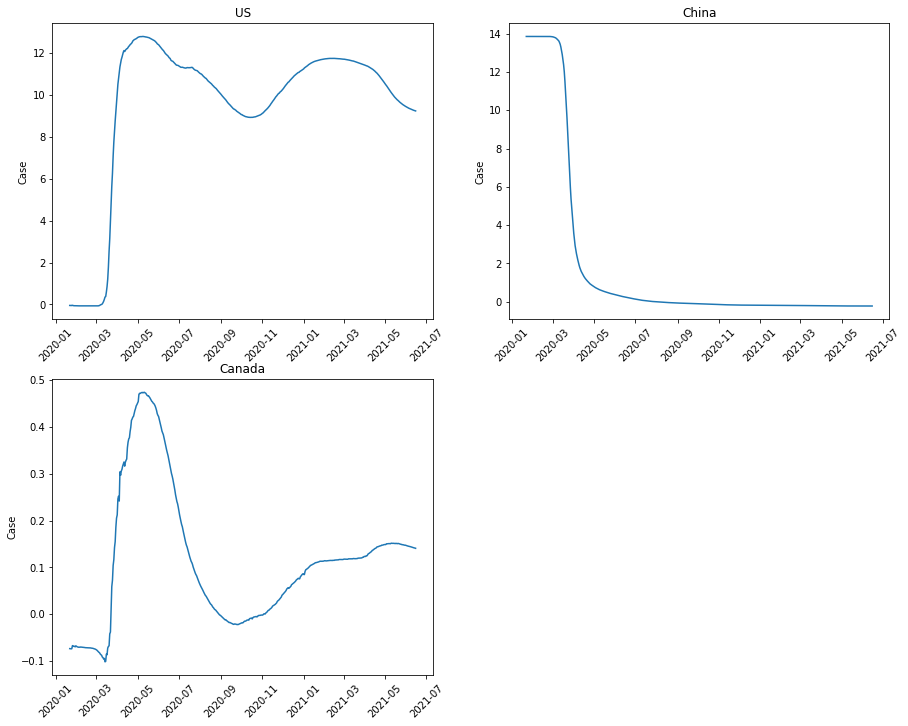

In [ ]:
#Question 3: Run the function in step 1 on the standardized dataset for the US, China, and Canada
PlotCovid(df_std,["US","China","Canada"])

*Question4: Discuss the trends in the standardized time-series for the US, Canada, and China. What does it mean if the curve goes up or down (are the number of covid cases negative?) What does the sign of values indicate?*

**The trend of cases in US is fluctuating: First, it started with a sharp increase since March 2020 and reached its peak in May 2020. Next, the number of cases gradualy decreased for about 5 months, and it rose again during October 2020 - Feburary 2021. However, it didn't reach a new peak, starting to decrease from March 2021. The cases in China has clearly downward trend. It started at the peak in January 2020 and rapidly decreases for the following 3 months. Since April 2020, the speed slowed down and remain constant September 2020 to June 2021. The trend of cases in Canada is different from the previous 2 countries. It started from negative number in standardized data and experienced sharp increase from March 2020 to May 2020. After reaching the highest point in May 2020, it rapdily decreased to zero in October 2020. Since then, the number of cases gradualy increased until June 2021.**

**The curve goes up indicating an increase of number of cases which is higher than the average of cases at that day among all countries.The curve goes down indicating an increase of number of cases which is lower than the average of cases at that day among all countries, and it doesn't mean that the cases of that day is negative. A "+" sign indicats that the number of cases is above the average cases at that day among all countries; whereas a "-" sign indicats that the number of cases is below the average at that day.**

# Part 2: Applying PCA [2 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (511, 511).* **[0.25]**
2. Write a function `get_sorted_eigen(df_cov)` that gets the covariance matrix of dataframe `df` (from step 1), and returns sorted eigenvalues and eigenvectors using `np.linalg.eigh`. **[0.25]**
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`. **[0.25]**
4. How many PCs do you need to cover 99% of the dataset's variance? **[0.25]**
5. Plot the first 16 principal components (Eigenvectors) as a time series (16 subplots, on the x-axis you have dates and on the y-axis you have the value of the PC element) . **[0.5]**
6. Compare the first few PCs with the rest of them. Do you see any difference in their trend? **[0.5]**

In [ ]:
n, m = df_std.shape #n= number of samples, m= number of features
# Compute covariance matrix
C = np.dot(df_std.T, df_std) / (n-1)

In [ ]:
C.shape

(511, 511)

In [ ]:
# Get decreasing order of eigenValues.
def get_sorted_eigen(df_cov):
  eigenValues, eigenVectors = np.linalg.eigh(df_cov)
  args = (-eigenValues).argsort()
  eigenValues = eigenValues[args]
  eigenVectors = eigenVectors[:, args]
  #print ("Eig Vec:\n ",eigenVectors, " \n Eig Val: \n", eigenValues)
  return eigenValues, eigenVectors


In [ ]:
eigenValues_sort, eigenVectors_sort=get_sorted_eigen(C)

In [ ]:
eigenValues_sort.shape

(511,)

In [ ]:
cases_raw.iloc[36,:]

2020-01-22       548
2020-01-23       643
2020-01-24       920
2020-01-25      1406
2020-01-26      2075
               ...  
2021-06-11    103320
2021-06-12    103357
2021-06-13    103380
2021-06-14    103401
2021-06-15    103424
Name: China, Length: 511, dtype: int64

In [ ]:
eigenVectors_sort

array([[-0.00068142,  0.12313007,  0.03865575, ...,  0.        ,
         0.        ,  0.        ],
       [-0.0006685 ,  0.12312809,  0.03867506, ..., -0.0072161 ,
        -0.01914882, -0.00337959],
       [-0.00070159,  0.12314123,  0.03858246, ..., -0.00256999,
         0.01102435,  0.03814935],
       ...,
       [-0.04721997, -0.00766504,  0.04392301, ...,  0.01055351,
         0.03266906,  0.00114774],
       [-0.04721007, -0.00768119,  0.04408039, ..., -0.00573702,
        -0.00311817, -0.00522846],
       [-0.0471996 , -0.00770528,  0.04430212, ...,  0.01102318,
         0.00717457,  0.03137014]])

In [ ]:
eigValSum = sum(eigenValues_sort)
expVar = [eigV/eigValSum*100 for eigV in eigenValues_sort]
cumExpVar = np.cumsum(expVar)

In [ ]:
len(expVar)

511

In [ ]:
cumExpVar

array([ 80.95992954,  93.23953264,  97.96647351,  99.24896476,
        99.70668524,  99.8306911 ,  99.90443943,  99.93772792,
        99.96737827,  99.97900054,  99.98674518,  99.99156315,
        99.9939598 ,  99.99552757,  99.99678028,  99.99764136,
        99.9982698 ,  99.99875264,  99.99900556,  99.99922495,
        99.9993941 ,  99.9994947 ,  99.99958503,  99.99966897,
        99.99973641,  99.99977903,  99.99981267,  99.99983516,
        99.99985584,  99.99987351,  99.99988977,  99.99990396,
        99.99991609,  99.99992568,  99.99993484,  99.99994207,
        99.99994897,  99.99995458,  99.99995978,  99.99996411,
        99.9999681 ,  99.99997153,  99.99997459,  99.99997729,
        99.99997971,  99.999982  ,  99.99998381,  99.99998536,
        99.99998678,  99.99998811,  99.9999893 ,  99.99999026,
        99.99999114,  99.99999191,  99.99999263,  99.99999328,
        99.99999385,  99.99999434,  99.99999479,  99.99999521,
        99.99999563,  99.999996  ,  99.9999963 ,  99.99

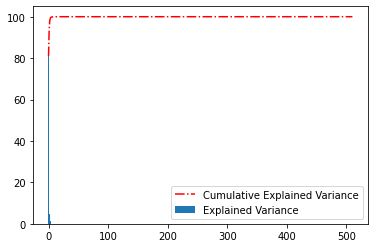

In [ ]:
#scree plot, use all principle components
plt.bar(np.arange(len(expVar)), expVar, label='Explained Variance')
plt.plot(cumExpVar, 'r-.', label='Cumulative Explained Variance')
plt.legend(loc=4)
plt.show() 

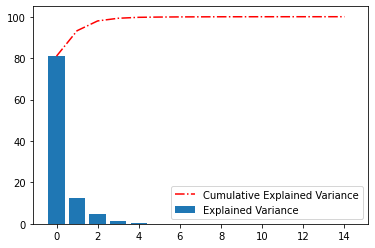

In [ ]:
#Zoom in scree plot, use the first 14 principle components
plt.clf()
plt.bar(np.arange(15),expVar[0:15], label='Explained Variance')
plt.plot(cumExpVar[0:15], 'r-.', label='Cumulative Explained Variance')
plt.legend(loc=4)
plt.show() 

In [ ]:
len(cumExpVar[cumExpVar<99])+1

4

*Question4: How many PCs do you need to cover 99% of the dataset's variance?*

**Based on the results we get above, we know that 4 PCS are needed to cover 99% of the dataset's variance.**

In [ ]:
#convert the eigenvectors into dataframe with column names
df_ev= pd.DataFrame(data=eigenVectors_sort, columns=["PC"+str(i) for i in np.arange(1,eigenVectors_sort.shape[1]+1)])
df_ev

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,...,PC472,PC473,PC474,PC475,PC476,PC477,PC478,PC479,PC480,PC481,PC482,PC483,PC484,PC485,PC486,PC487,PC488,PC489,PC490,PC491,PC492,PC493,PC494,PC495,PC496,PC497,PC498,PC499,PC500,PC501,PC502,PC503,PC504,PC505,PC506,PC507,PC508,PC509,PC510,PC511
0,-0.000681,0.123130,0.038656,-0.029650,0.049162,-0.022779,0.005260,-0.015855,0.052770,-0.026611,0.033426,-0.016657,0.013028,0.035942,-0.015812,-0.021772,-0.013309,-0.004816,-0.008802,0.000687,-0.044620,0.158205,-0.037397,0.121964,-0.071616,0.017617,-0.046071,-0.008677,-0.038712,-0.384937,0.244061,0.129572,-0.042256,-0.086374,-0.001633,-0.108812,-0.121109,-0.030205,-0.143002,0.164574,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.000668,0.123128,0.038675,-0.029667,0.049126,-0.022876,0.004991,-0.015893,0.053100,-0.026714,0.034505,-0.017739,0.012703,0.037338,-0.016692,-0.022909,-0.009785,-0.002900,-0.010371,0.004489,-0.037805,0.158248,-0.034854,0.116397,-0.059557,0.019898,-0.068141,0.003650,-0.026240,-0.331098,0.243392,0.133323,-0.017923,0.041387,-0.002855,0.000554,-0.035415,-0.020887,-0.062592,-0.013999,...,0.003187,-0.003595,-0.003483,-0.000293,0.003093,-0.004214,0.000194,0.005595,-0.008566,0.001021,0.001970,0.001498,-0.004102,-0.002986,0.004246,0.005047,-0.005373,0.014248,0.008590,0.001763,0.006990,-0.015546,-0.009844,0.007036,0.021441,0.004414,0.004881,-0.001340,-0.041335,-0.003637,-0.036601,-0.011989,-0.008762,-0.007708,-0.045133,0.005922,0.024275,-0.007216,-0.019149,-0.003380
2,-0.000702,0.123141,0.038582,-0.029512,0.049278,-0.022431,0.004384,-0.014772,0.054257,-0.019224,0.036481,-0.018424,0.011957,0.030312,-0.013899,-0.022800,-0.011480,-0.004458,-0.008586,0.011783,-0.033698,0.163622,-0.037392,0.112960,-0.047545,0.021315,-0.083970,0.020936,-0.018168,-0.264361,0.218499,0.123462,0.004065,0.156303,-0.033321,0.110330,0.059823,0.002726,0.041466,-0.135999,...,-0.000115,-0.002126,0.005542,-0.005350,0.000606,0.000389,-0.002995,-0.003171,0.006051,0.001507,-0.001353,0.000301,-0.002608,-0.004333,0.005707,-0.001336,0.000939,0.007551,0.001325,0.013634,-0.011889,-0.005409,0.016630,-0.028543,-0.015907,0.033949,-0.000491,0.004786,0.001809,-0.034621,0.064128,0.048730,-0.053134,0.000606,0.023498,0.002208,0.006251,-0.002570,0.011024,0.038149
3,-0.000674,0.123136,0.038648,-0.029451,0.049227,-0.022134,0.004532,-0.015036,0.055661,-0.020780,0.037235,-0.018610,0.014858,0.033846,-0.016564,-0.026566,-0.012804,-0.006470,-0.004498,0.008003,-0.050735,0.141785,-0.031513,0.088314,-0.045666,0.013071,-0.041851,0.024007,-0.060430,-0.124529,0.079015,0.064470,0.021564,0.084813,-0.084128,0.000814,-0.016427,0.086763,0.135003,-0.089421,...,-0.000802,-0.006001,0.006146,0.001011,-0.005879,0.022099,0.003018,-0.007860,-0.003783,-0.009230,0.001220,-0.001806,-0.002464,0.010614,-0.004087,-0.003079,0.001816,-0.024251,-0.005277,-0.009061,-0.016924,0.008758,0.019167,-0.011239,0.020834,-0.055631,-0.000173,-0.074457,0.037434,0.060845,-0.007002,-0.031899,0.139563,0.005364,0.049479,0.005536,-0.024031,-0.013016,0.020178,-0.014151
4,-0.000710,0.123139,0.038576,-0.029574,0.049337,-0.022648,0.004751,-0.015368,0.054533,-0.022691,0.036627,-0.018380,0.013373,0.035447,-0.014345,-0.025655,-0.010893,-0.006172,-0.006254,0.005377,-0.044879,0.143695,-0.032513,0.089294,-0.034917,0.028536,-0.028868,-0.006281,-0.028451,-0.082171,0.056611,0.048754,0.045650,-0.019181,-0.061264,0.048106,0.038126,0.051919,0.085658,0.011820,...,-0.008385,0.012051,-0.019005,0.009495,-0.003288,-0.024193,0.008429,-0.001845,0.013865,0.006069,-0.012252,-0.012265,0.012142,0.

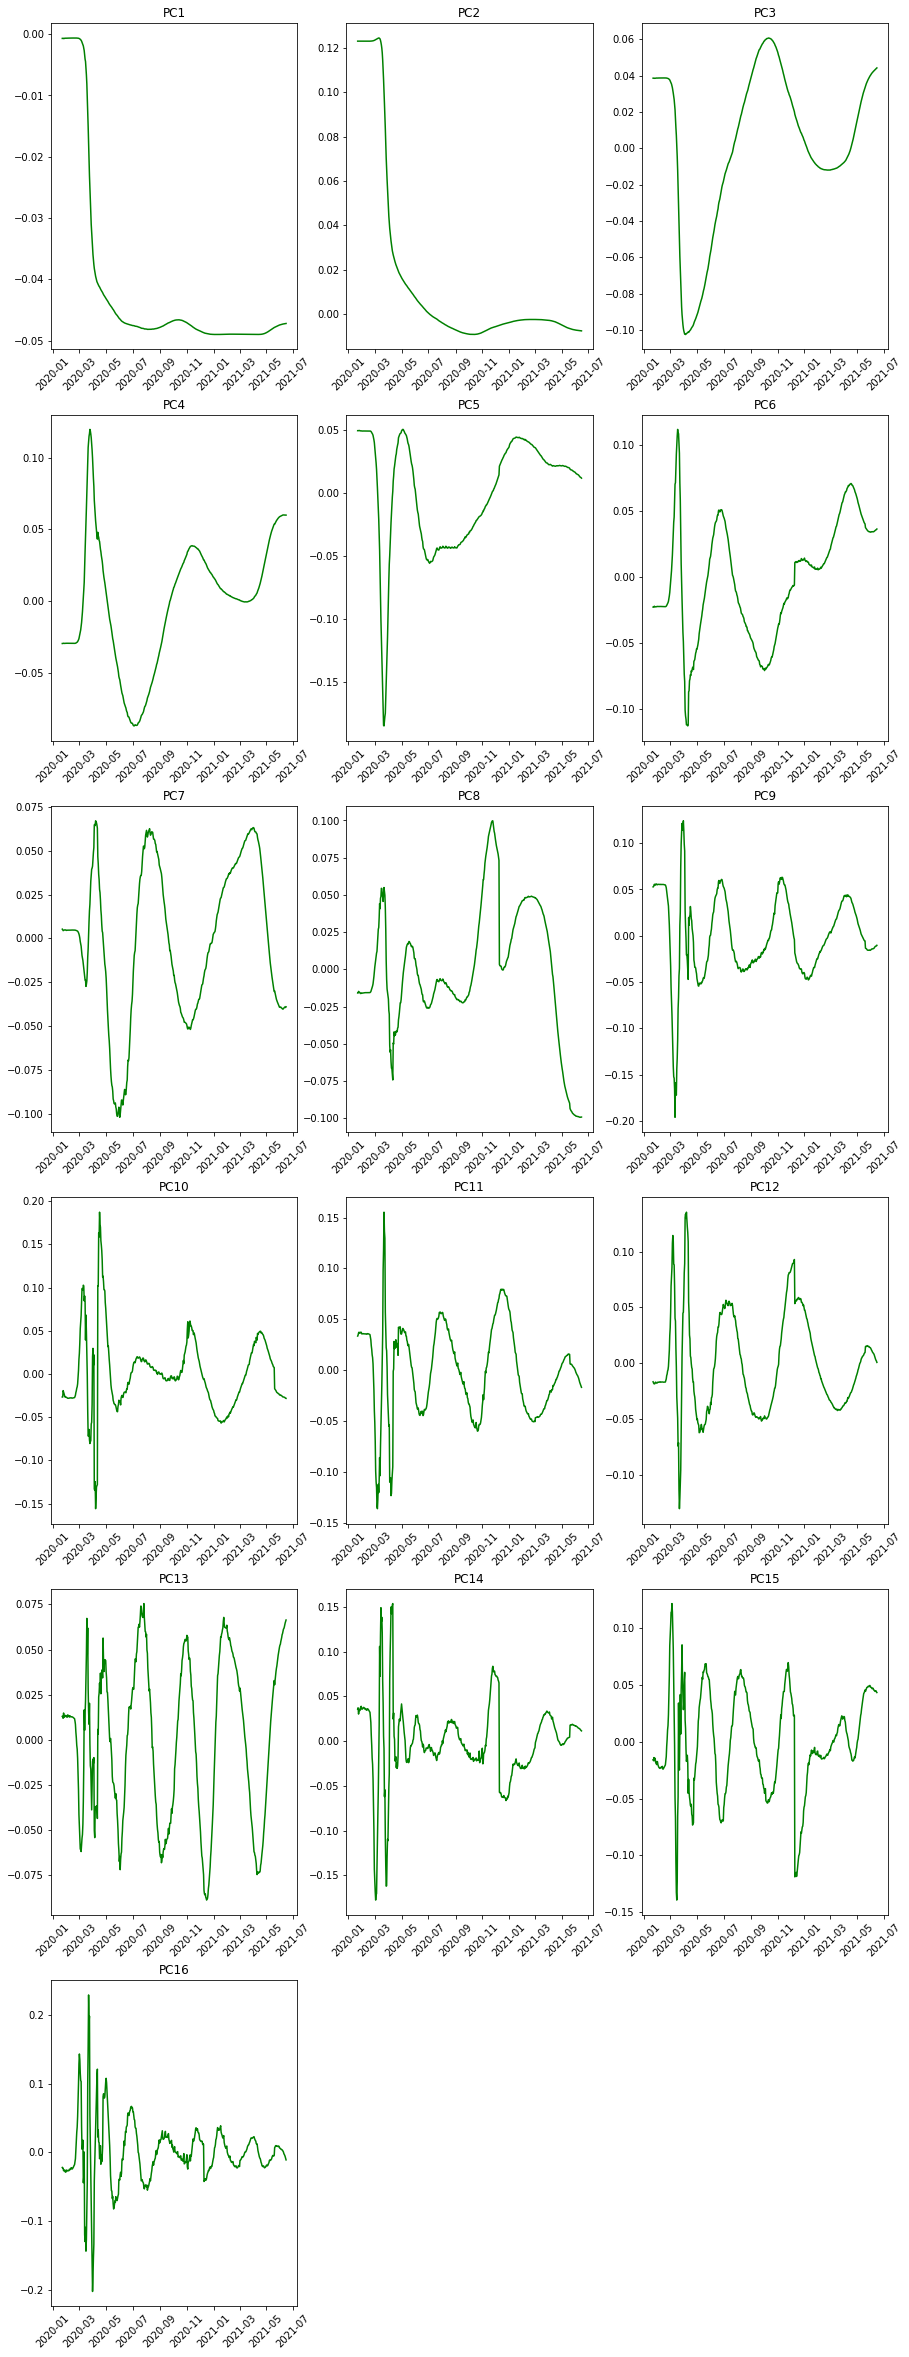

In [ ]:
#Question5: Plot the first 16 principal components (Eigenvectors) as a time series 
#16 subplots, on the x-axis you have dates and on the y-axis you have the value of the PC element
COUNT1 = 16
ROWS1 = math.ceil(COUNT1/3)
fig = plt.figure(figsize=(15, ROWS1 * 7))
date=pd.to_datetime(cases_raw.columns)
for i in range(0, COUNT1):
  plt.subplot(ROWS1, 3, i+1) 
  sns.lineplot(x=date,y=df_ev.iloc[:,i],color='green')
  plt.ylabel("")
  plt.title(df_ev.columns[i])
  plt.xticks(rotation=45)


*Question 6: Compare the first few PCs with the rest of them. Do you see any difference in their trend?*

**The fisrt 2 principle components both follow decreasing trends. From PC3 to PC8, there's no longer decreasing trends, but some fluctuations during the dates in dataset. From PC9 to PC16, there seems to be more frequent fluctuations around constant means, and volatility gradually drops as dates approching to June 2021.**

# Part 3: Data reconstruction [3 Marks]

Create a function that:

*   Accepts a country and the original dataset as inputs.
*   Calls useful functions that you designed in previous parts to compute eigen vectors and eigen values. 
*   Plots 4 figures:
  1.   The original time-series for the specified country. **[0.5]**
  2.   The incremental reconstruction of the **original** (not standardized) time-series for the specified country in a single plot. **[1.5]**
       * You should at least show 5 curves in a figure for incremental reconstruction. For example, you can pick the following (or any other combination that you think is reasonable): 
          * Reconstruction with only PC1
          * Reconstruction with both PC1 and PC2
          * Reconstruction with PC1 to PC4 (First 4 PCs)
          * Reconstruction with PC1 to PC8 (First 8 PCs)
          * Reconstruction with PC1 to PC16 (First 16 PCs)

      * Hint: you need to compute the reconstruction for the standardized time-series first, and then scale it back to the original (non-standardized form) using the StandardScaler `inverse_transform` [help...](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform)
  3.   The residual error for your best reconstruction with respect to the original time-series. **[0.5]**
      * Hint: You are plotting the error that we have for reconstructing each day `(df - df_reconstructed)`. On the x-axis, you have dates, and on the y-axis, the residual error. 
  4.   The RMSE of the reconstruction as a function of the number of included components (x-axis is the number of components and y-axis is the RMSE). Sweep x-axis from 1 to 10 (this part is independent from part 3.2.) **[1]**

Test your function using the `US`, `Canada`, and `China` as inputs. **[0.5]**


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
def plot_country_figures(original_df, country_name):
  #index=original_df.index.get_loc(country_name)#find the index of that country in the original data
  scaler = StandardScaler().fit(original_df)
  standard = scaler.transform(original_df)
  df_standard= pd.DataFrame(data=standard, index=original_df.index, columns=original_df.columns)
  p, q = df_standard.shape  
  Cov = np.dot(df_standard.T, df_standard) / (p-1) #Compute covariance matrix
  eigenValue, eigenVector=get_sorted_eigen(Cov) #Compute eigen vectors and eigen values
  W1 = eigenVector[:,:1] #only PC1
  W2= eigenVector[:,:2] #both PC1 and PC2
  W3= eigenVector[:,:4] #First 4 PCs
  W4= eigenVector[:,:8] #First 8 PCs
  W5= eigenVector[:,:16] #First 16 PCs
  # calculate projections
  proj1 = np.dot(df_standard, W1)
  proj2 = np.dot(df_standard, W2)
  proj3 = np.dot(df_standard, W3)
  proj4 = np.dot(df_standard, W4)
  proj5 = np.dot(df_standard, W5)
  # reconstruction to the standardized data
  Recon1 = np.dot(proj1, W1.T)
  Recon2 = np.dot(proj2, W2.T)
  Recon3 = np.dot(proj3, W3.T)
  Recon4 = np.dot(proj4, W4.T)
  Recon5 = np.dot(proj5, W5.T)
  #scale it back to the original
  inver1=pd.DataFrame(data=scaler.inverse_transform(Recon1),index=original_df.index)
  inver2=pd.DataFrame(data=scaler.inverse_transform(Recon2),index=original_df.index)
  inver4=pd.DataFrame(data=scaler.inverse_transform(Recon3),index=original_df.index)
  inver8=pd.DataFrame(data=scaler.inverse_transform(Recon4),index=original_df.index)
  inver16=pd.DataFrame(data=scaler.inverse_transform(Recon5),index=original_df.index)

  plt.figure(1,figsize=(12,20))
  dates=pd.to_datetime(original_df.columns)
  #Plot the original time-series for the specified country
  ax1=plt.subplot(411)
  sns.lineplot(x=dates,y=original_df.loc[country_name])
  plt.title("original time-series")
  #Plot the incremental reconstruction using different PCs
  ax2=plt.subplot(412,sharey=ax1)
  sns.lineplot(x=dates,y=inver1.loc[country_name],color='red',label="1 PC")
  sns.lineplot(x=dates,y=inver2.loc[country_name],color='blue',label="2 PCs")
  sns.lineplot(x=dates,y=inver4.loc[country_name],color='orange',label="4 PCs")
  sns.lineplot(x=dates,y=inver8.loc[country_name],color='magenta',label="8 PCs")
  sns.lineplot(x=dates,y=inver16.loc[country_name],color='green',label="16 PCs")
  plt.title("Reconstruction with PCs")
  plt.legend(loc=2)
  #find the best one by comparing sum of absolute values of residuals
  temp=pd.concat([inver1.loc[country_name],inver2.loc[country_name],inver4.loc[country_name],inver8.loc[country_name],inver16.loc[country_name]],axis=1)
  temp.columns=["inver1","inver2","inver4","inver8","inver16"]
  value=[]
  for column in temp:
    residual_sum=sum(abs(original_df.loc[country_name].values-temp[column].values))
    value.append(residual_sum)
  #calculate residual for the best one
  best=original_df.loc[country_name].values-temp[temp.columns[np.argmin(value)]].values
  #Plot the residual error for the best reconstruction
  ax3=plt.subplot(413)
  sns.lineplot(x=date,y=best)
  plt.title("Residual Error using "+temp.columns[np.argmin(value)])
  #Plot RMSE with x-axis sweep from 1 to 10
  ax4=plt.subplot(414)
  RMSE=[]
  for i in np.arange(1,11):
    W6 = eigenVector[:,:i]
    proj6 = np.dot(df_standard, W6)
    Recon6 = np.dot(proj6, W6.T)
    inver6=pd.DataFrame(data=scaler.inverse_transform(Recon6),index=original_df.index)
    MSE=mean_squared_error(original_df.loc[country_name], inver6.loc[country_name])
    RMSE.append(sqrt(MSE))
  plt.plot(np.arange(1,11),RMSE)
  plt.title("RMSE vs Number of Components")




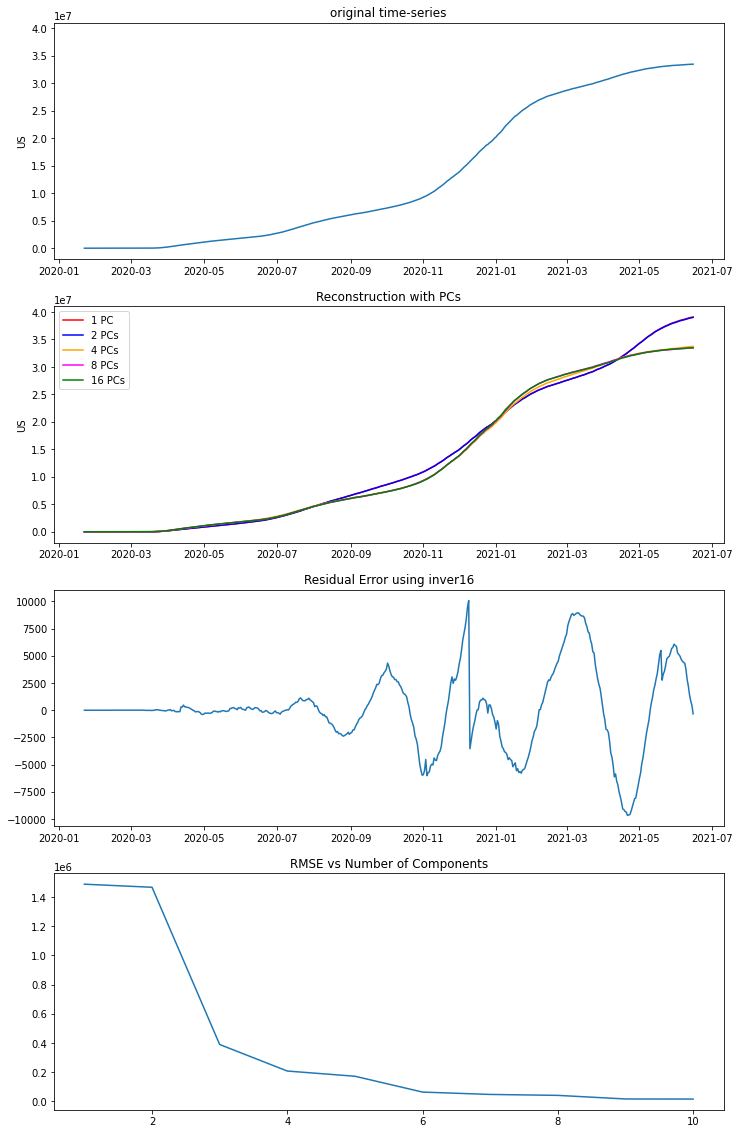

In [ ]:
plot_country_figures(cases_raw, 'US')

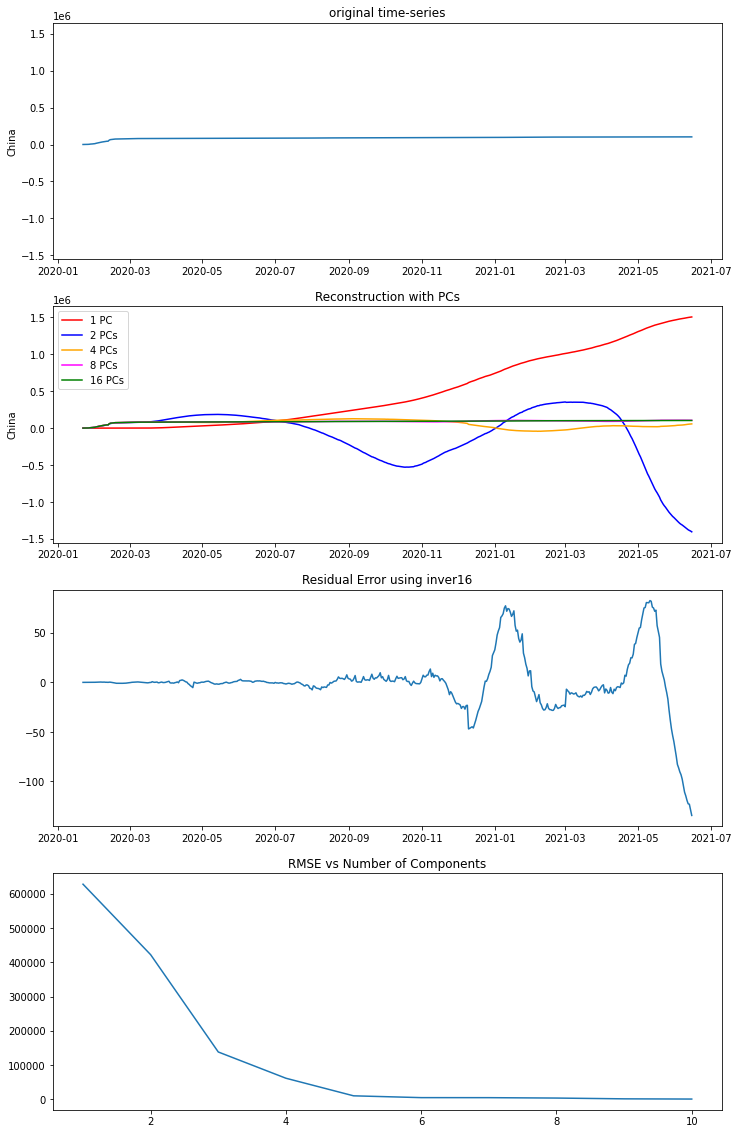

In [ ]:
plot_country_figures(cases_raw, 'China')

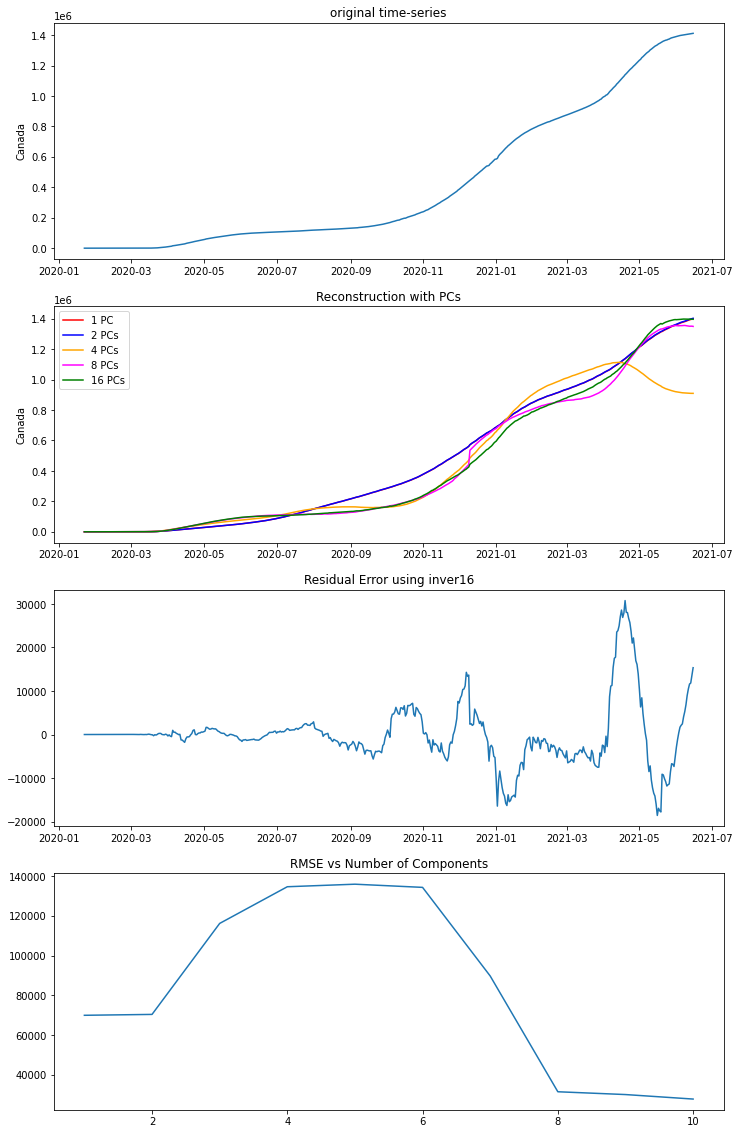

In [ ]:
plot_country_figures(cases_raw, 'Canada')

# Part 4: SVD [2 Marks]
Modify your code in part 3 to use SVD instead of PCA for extracting the eigenvectors. **[1]**

Explain if standardization or covariance computation is required for this part.
Repeat part 3 and compare your PCA and SVD results. **[1]**



In [ ]:
def plot_country_figures_SVD(original_df, country_name):
  scaler = StandardScaler().fit(original_df)
  standard = scaler.transform(original_df)
  df_standard= pd.DataFrame(data=standard, index=original_df.index, columns=original_df.columns)
  #Compute eigen vectors and eigen values using SVD
  U, S, V = np.linalg.svd(df_standard)
  # reconstruction using first singular value
  u1 = U[:,0:1]
  v1 = V[0:1,:]
  A1 = S[0]*u1@v1
  # reconstruction using first 2 singular values
  u2 = U[:,0:2]
  v2 = V[0:2,:]
  A2 = S[0:2]*u2@v2
  # reconstruction using first 4 singular values
  u4 = U[:,0:4]
  v4 = V[0:4,:]
  A4 = S[0:4]*u4@v4
  # reconstruction using first 8 singular values
  u8 = U[:,0:8]
  v8 = V[0:8,:]
  A8 = S[0:8]*u8@v8
  # reconstruction using first 16 singular values
  u16 = U[:,0:16]
  v16 = V[0:16,:]
  A16 = S[0:16]*u16@v16
  #scale it back to the original
  inver1=pd.DataFrame(data=scaler.inverse_transform(A1),index=original_df.index)
  inver2=pd.DataFrame(data=scaler.inverse_transform(A2),index=original_df.index)
  inver4=pd.DataFrame(data=scaler.inverse_transform(A4),index=original_df.index)
  inver8=pd.DataFrame(data=scaler.inverse_transform(A8),index=original_df.index)
  inver16=pd.DataFrame(data=scaler.inverse_transform(A16),index=original_df.index)

  plt.figure(1,figsize=(12,20))
  dates=pd.to_datetime(original_df.columns)
  #Plot the original time-series for the specified country
  ax1=plt.subplot(411)
  sns.lineplot(x=dates,y=original_df.loc[country_name])
  plt.title("original time-series")
  #Plot the incremental reconstruction using different PCs
  ax2=plt.subplot(412,sharey=ax1)
  sns.lineplot(x=dates,y=inver1.loc[country_name],color='red',label="1 PC")
  sns.lineplot(x=dates,y=inver2.loc[country_name],color='blue',label="2 PCs")
  sns.lineplot(x=dates,y=inver4.loc[country_name],color='orange',label="4 PCs")
  sns.lineplot(x=dates,y=inver8.loc[country_name],color='magenta',label="8 PCs")
  sns.lineplot(x=dates,y=inver16.loc[country_name],color='green',label="16 PCs")
  plt.title("Reconstruction with PCs")
  plt.legend(loc=2)
  #find the best one by comparing sum of absolute values of residuals
  temp=pd.concat([inver1.loc[country_name],inver2.loc[country_name],inver4.loc[country_name],inver8.loc[country_name],inver16.loc[country_name]],axis=1)
  temp.columns=["inver1","inver2","inver4","inver8","inver16"]
  value=[]
  for column in temp:
    residual_sum=sum(abs(original_df.loc[country_name].values-temp[column].values))
    value.append(residual_sum)
  #calculate residual for the best one
  best=original_df.loc[country_name].values-temp[temp.columns[np.argmin(value)]].values
  #Plot the residual error for the best reconstruction
  ax3=plt.subplot(413)
  sns.lineplot(x=dates,y=best)
  plt.title("Residual Error using "+temp.columns[np.argmin(value)])
  #Plot RMSE with x-axis sweep from 1 to 10
  ax4=plt.subplot(414)
  RMSE=[]
  for i in np.arange(1,11):
    u = U[:,0:i]
    v = V[0:i,:]
    A = S[0:i]*u@v
    df_A=pd.DataFrame(data=scaler.inverse_transform(A),index=original_df.index)
    MSE=mean_squared_error(original_df.loc[country_name], df_A.loc[country_name])
    RMSE.append(sqrt(MSE))
  plt.plot(np.arange(1,11),RMSE)
  plt.title("RMSE vs Number of Components")


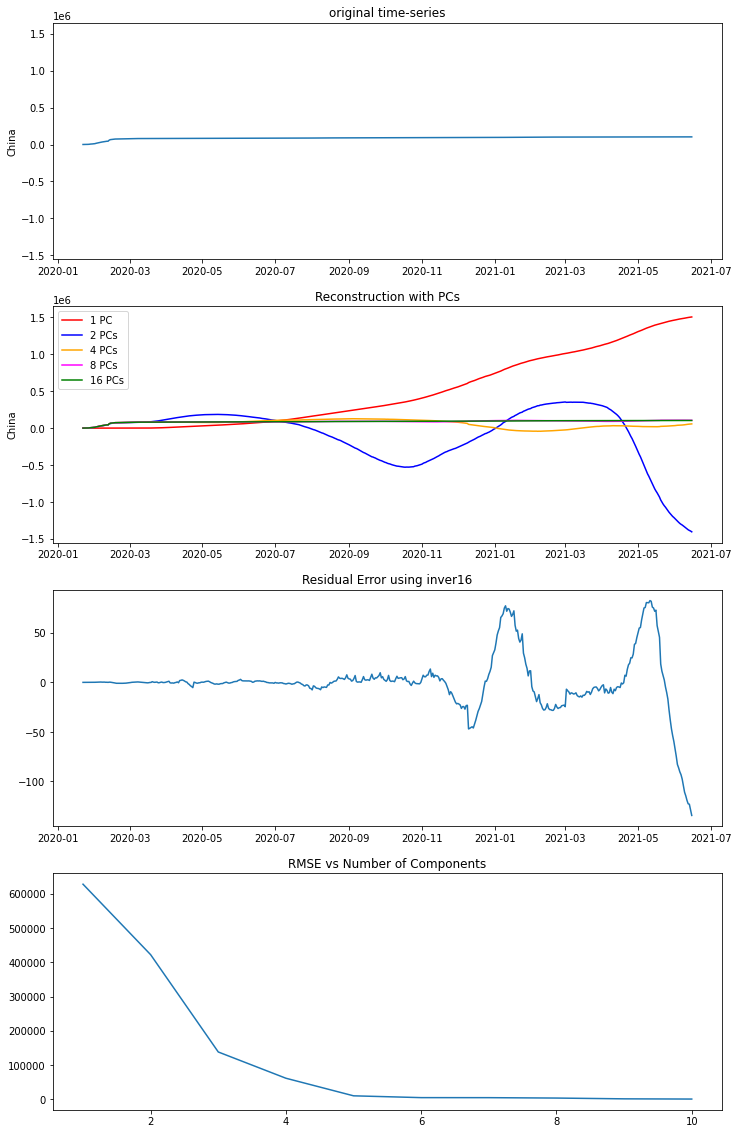

In [ ]:
plot_country_figures_SVD(cases_raw, 'China')

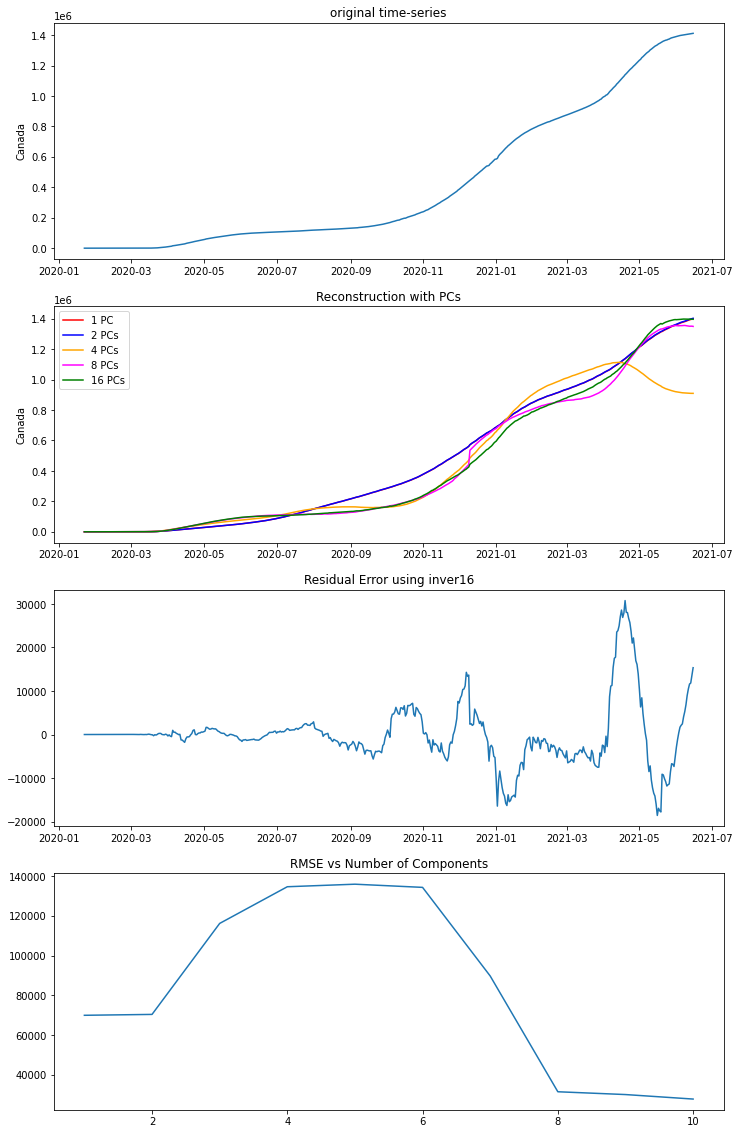

In [ ]:
plot_country_figures_SVD(cases_raw, 'Canada')

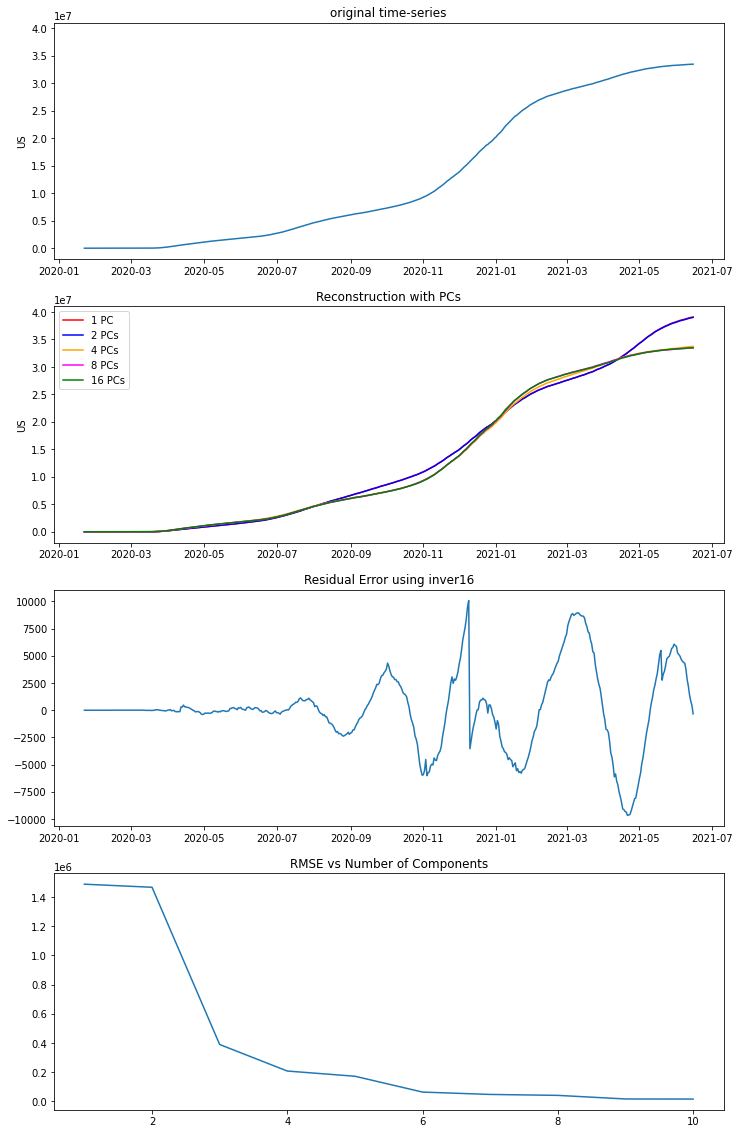

In [ ]:
plot_country_figures_SVD(cases_raw, 'US')

Standardization or covariance computation is not required for SVD, however, since I standardized data in Part 3, to follow the exactly same instruction, I do the standardization in Part 4 as well.

**The results are exactly the same to what we get in Part 3. This is due to the fact that for the features are normalized, PCA(eigendecomposition) and SVD are the same.**

# Part 5: Let's collect a more recent dataset! [2 Marks]
Create a more recent dataset similar to the one provided in your handout using the raw information provided [here](https://datahub.io/core/covid-19#resource-time-series-19-covid-combined). **[1]**

You need to manipulate the data to organize it in the desired format. You are free to use any tools you like, from Excel to Python!
 
In the end, you should have a new CSV file with more dates (features) compared to the provided dataset. 


Upload your new dataset (in CSV format) to your colab notebook and repeat part 4. **[1]**


Don't forget to add your new CSV file to your GitHub repo. The code below helps you to upload your new CSV file to your colab session. 




**I downloaded the file countries-aggregated_csv. Then, I use Excel to delete the columns "Recovered" and "Deaths". Since I only want to use data in 2021, so I use filter function to select data from 2021-01-01, and create a new sheet to store my manipulation. Now, the csv file I want to upload to google colab contains 3 columns: Date(from 2021), Country, and Confirmed.**

In [ ]:
# load new data to Google Colab
from google.colab import files
uploaded = files.upload()

Saving countries_2021.csv to countries_2021.csv


In [ ]:
new_data = pd.read_csv("countries_2021.csv")
new_data['Date']=pd.to_datetime(new_data['Date'])
new_data

,Date,Country,Confirmed
0,2021-01-01,Afghanistan,52513
1,2021-01-02,Afghanistan,52586
2,2021-01-03,Afghanistan,52709
3,2021-01-04,Afghanistan,52909
4,2021-01-05,Afghanistan,53011
...,...,...,...
59775,2021-10-28,Zimbabwe,132880
59776,2021-10-29,Zimbabwe,132926
59777,2021-10-30,Zimbabwe,132926
59778,2021-10-31,Zimbabwe,132977


In [ ]:
#Create a more recent dataset similar to the one provided in Part1
table = pd.pivot_table(new_data,index=['Country'],columns=['Date'],values=['Confirmed'])
table.columns=table.columns.droplevel()
table.columns.name=None
table

,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-09,2021-01-10,2021-01-11,2021-01-12,2021-01-13,2021-01-14,2021-01-15,2021-01-16,2021-01-17,2021-01-18,2021-01-19,2021-01-20,2021-01-21,2021-01-22,2021-01-23,2021-01-24,2021-01-25,2021-01-26,2021-01-27,2021-01-28,2021-01-29,2021-01-30,2021-01-31,2021-02-01,2021-02-02,2021-02-03,2021-02-04,2021-02-05,2021-02-06,2021-02-07,2021-02-08,2021-02-09,...,2021-09-23,2021-09-24,2021-09-25,2021-09-26,2021-09-27,2021-09-28,2021-09-29,2021-09-30,2021-10-01,2021-10-02,2021-10-03,2021-10-04,2021-10-05,2021-10-06,2021-10-07,2021-10-08,2021-10-09,2021-10-10,2021-10-11,2021-10-12,2021-10-13,2021-10-14,2021-10-15,2021-10-16,2021-10-17,2021-10-18,2021-10-19,2021-10-20,2021-10-21,2021-10-22,2021-10-23,2021-10-24,2021-10-25,2021-10-26,2021-10-27,2021-10-28,2021-10-29,2021-10-30,2021-10-31,2021-11-01
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,52513,52586,52709,52909,53011,53105,53207,53332,53400,53489,53538,53584,53690,53775,53831,53938,53984,54062,54141,54278,54403,54483,54559,54595,54672,54750,54854,54891,54939,55008,55023,55059,55121,55174,55231,55265,55330,55335,55359,55384,...,154800,154960,154960,154960,155072,155093,155128,155174,155191,155191,155191,155287,155309,155380,155429,155448,155466,155508,155540,155599,155627,155682,155688,155739,155764,155776,155801,155859,155891,155931,155940,155944,156040,156071,156124,156166,156196,156210,156250,156284
Albania,58316,58991,59438,59623,60283,61008,61705,62378,63033,63595,63971,64627,65334,65994,66635,67216,67690,67982,68568,69238,69916,70655,71441,72274,72812,73691,74567,75454,76350,77251,78127,78992,79934,80941,81993,83082,84212,85336,86289,87528,...,165864,166690,167354,167893,168188,168782,169462,170131,170778,171327,171794,171794,172618,173190,173723,174168,174643,174968,175163,175664,176172,176667,177108,177536,177971,178188,178804,179463,180029,180623,181252,181696,181960,182610,183282,183873,184340,184887,185300,185497
Algeria,99897,100159,100408,100645,100873,101120,101382,101657,101913,102144,102369,102641,102860,103127,103381,103611,103833,104092,104341,104606,104852,105124,105369,105596,105854,106097,106359,106610,106887,107122,107339,107578,107841,108116,108381,108629,108629,109088,109313,109559,...,202283,202449,202574,202722,202877,203045,203198,203359,203517,203657,203789,203915,204046,204171,204276,204388,204490,204597,204695,204790,204900,205005,205106,205199,205286,205364,205453,205529,205599,205683,205750,205822,205903,205990,206069,206160,206270,206358,206452,206566
Andorra,8117,8166,8192,8249,8308,8348,8348,8489,8586,8586,8586,8682,8818,8868,8946,9038,9083,9083,9194,9308,9379,9416,9499,9549,9596,9638,9716,9779,9837,9885,9937,9972,10017,10070,10137,10172,10206,10251,10275,10312,...,15156,15167,15167,15167,15189,15192,15209,15222,15222,15222,15222,15267,15271,15284,15288,15291,15291,15291,15307,15307,15314,15326,15338,15338,15338,15367,15369,15382,15382,15404,15404,15404,15425,15425,15462,15505,15516,15516,15516,15516
Angola,17568,17608,17642,17684,17756,17864,17974,18066,18156,18193,18254,18343,18425,18613,18679,18765,18875,18926,19011,19093,19177,19269,19367,19399,19476,19553,19580,19672,19723,19782,19796,19829,19900,19937,19996,20030,20062,20086,20112,20163,...,53840,54280,54795,55121,55583,56040,56583,56583,58076,58603,58943,58943,59895,60448,60803,61023,61245,61378,61580,61794,62143,62385,62606,62789,62842,63012,63197,63340,63567,63691,63775,63861,63930,64033,64126,64226,64301,64374,64433,64458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,1474,1482,1494,1497,1504,1505,1509,1512,1513,1514,1515,1520,1521,1531,1536,1537,1537,1539,1540,1544,

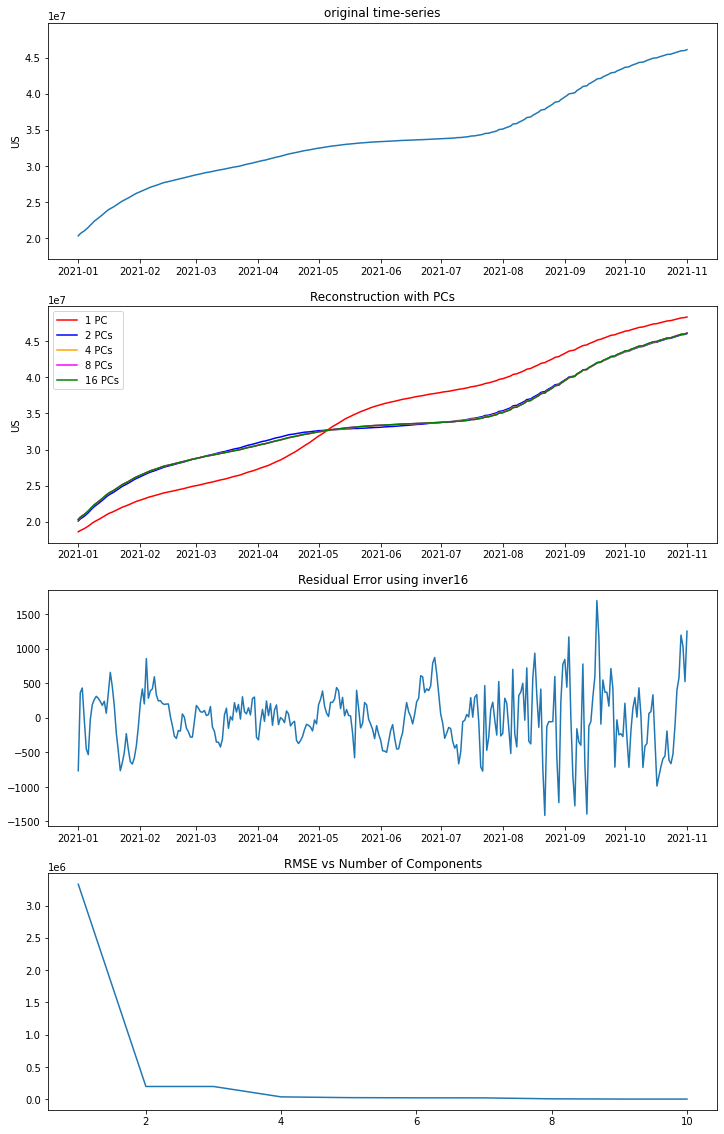

In [ ]:
#Repeat Part4
plot_country_figures_SVD(table, 'US')

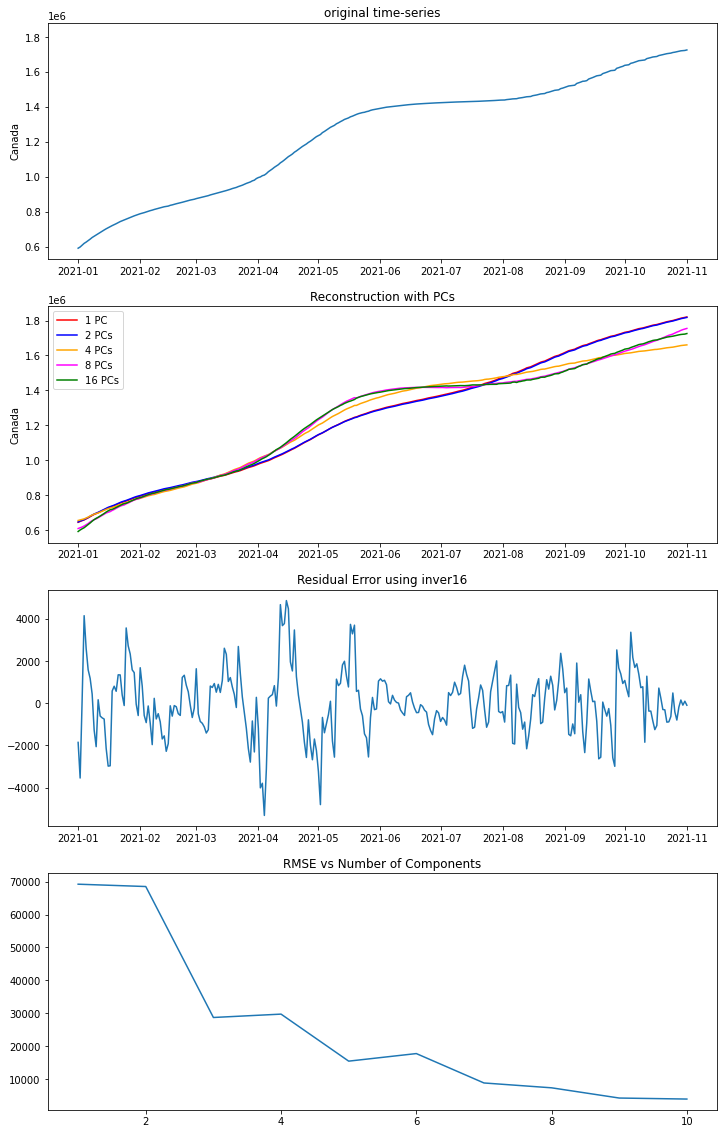

In [ ]:
plot_country_figures_SVD(table, 'Canada')

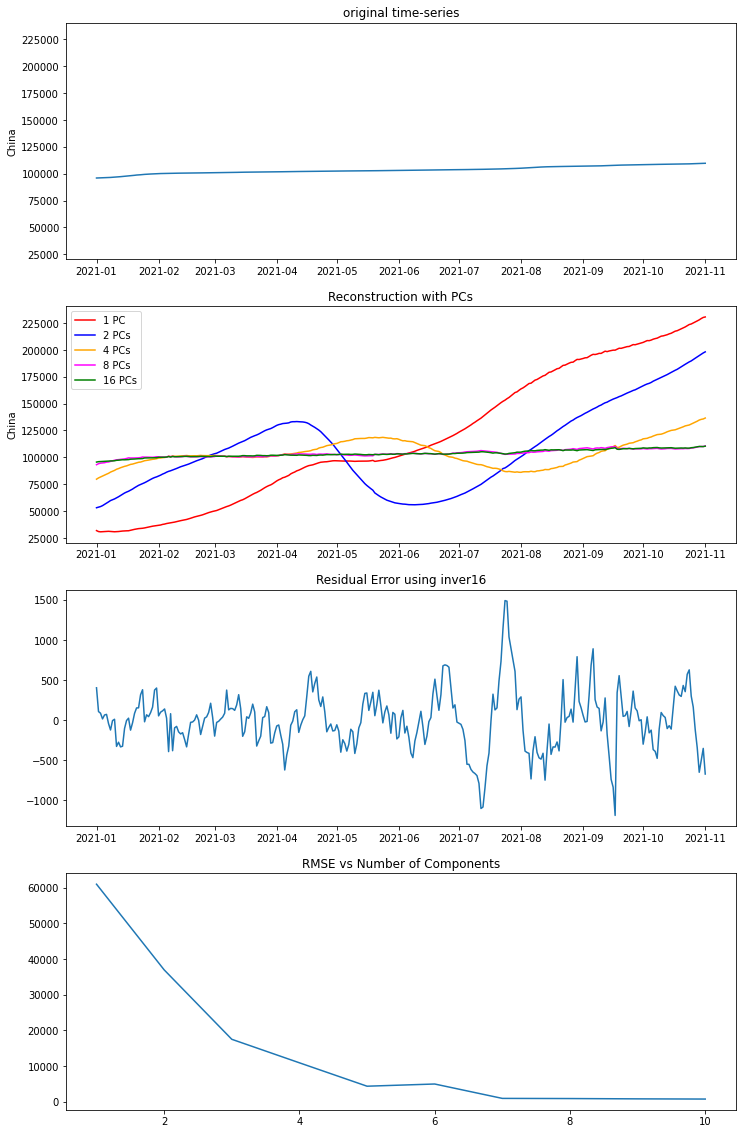

In [ ]:
plot_country_figures_SVD(table, 'China')

References

Understanding PCA and SVD:

1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:

1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/

2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:

1. https://www.worldometers.info/coronavirus/

2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined

